For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public. We will use a data frame with 777 observations on the following 18 variables.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Himanshu Agarwal\Desktop\Python programs\ML using Python Microsoft\College_Data")

In [3]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
#Let's clean our data first

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

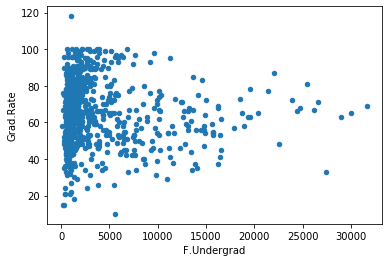

In [7]:
#Exercise- Plot a scatter graph of F.Undergrad V/S Grad.Rate
df.plot.scatter('F.Undergrad','Grad.Rate')

In [8]:
df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [9]:
#Before starting with K-Means Clustering, let's see how to visualise data and plot graphs using 'seaborn' library.
#Seaborn library-

In [10]:
#Import seaborn library-
import seaborn as sns

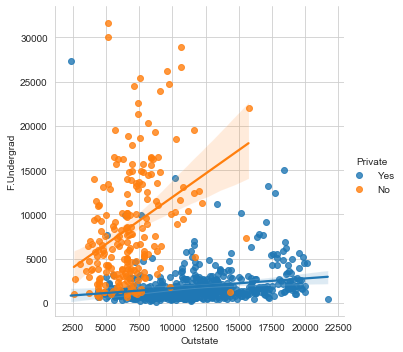

In [11]:
#Let's see how to plot a lmplot of 2 columns seperated based on Private column
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df,hue='Private')

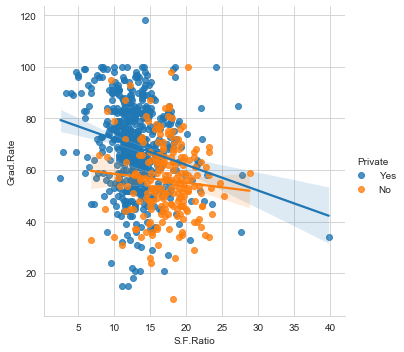

In [12]:
sns.set_style('whitegrid')
sns.lmplot('S.F.Ratio','Grad.Rate',data=df,hue='Private')

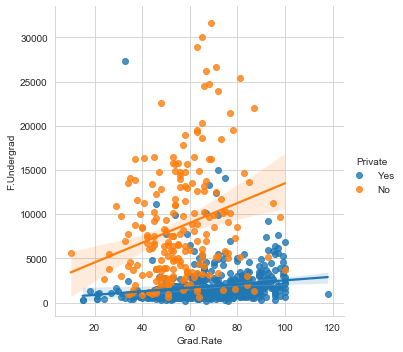

In [13]:
sns.set_style('whitegrid')
sns.lmplot('Grad.Rate','F.Undergrad',data=df,hue='Private')

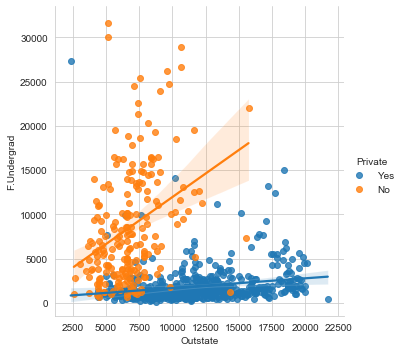

In [15]:
#Exercise- Plot a lmplot of F.Undergrad v/s Outstate seperated on private

sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df,hue='Private')

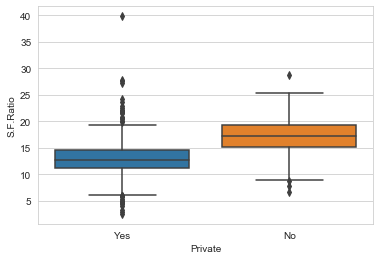

In [16]:
#To plot a boxplot using sns-

sns.boxplot(x='Private',y='S.F.Ratio',data=df)

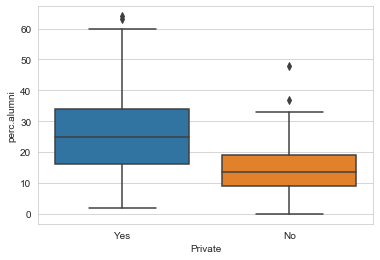

In [17]:
#Exercise- Plot a boxplot of: 1. Private vs perc.alumni
sns.boxplot(x='Private',y='perc.alumni',data=df)

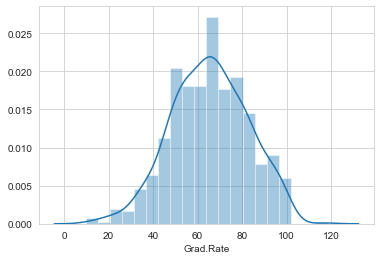

In [18]:
#Plotting histograms with seaborn

sns.distplot(df['Grad.Rate'])

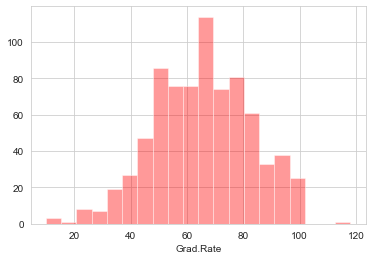

In [19]:
#As we can see, seaborn library provides us with a density line on histogram as well.
#If we want to remove the density line from the histogram, pass kde=False as a parameter
#Additionally, it sns.distplot takes a color parameter as well to color the histogram as per our choice

sns.distplot(df['Grad.Rate'],kde=False,color='red')

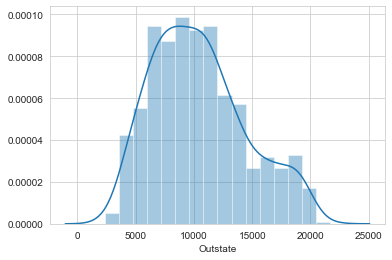

In [20]:
#Exercise- Plot a histogram of Outstate with and without the density line

sns.distplot(df['Outstate'])

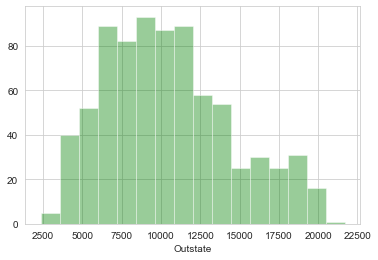

In [22]:
sns.distplot(df['Outstate'],kde=False,color='green')

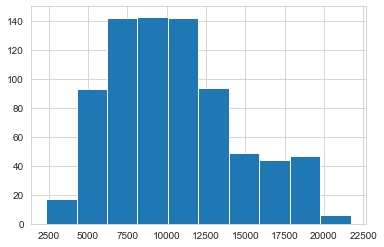

In [24]:
#As we all know, we used to plot histograms without seaborn module as-
df['Outstate'].hist()

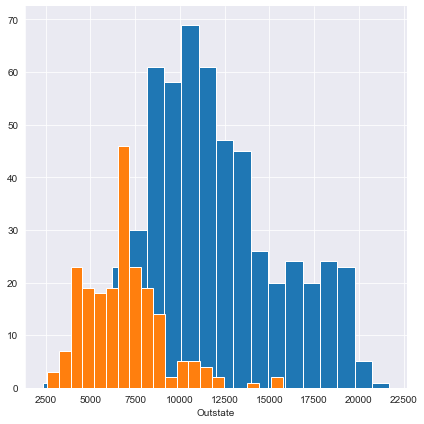

In [28]:
#Another method to plot a histoggram is 

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue='Private',size=6)
g = g.map(plt.hist,'Outstate',bins=20)

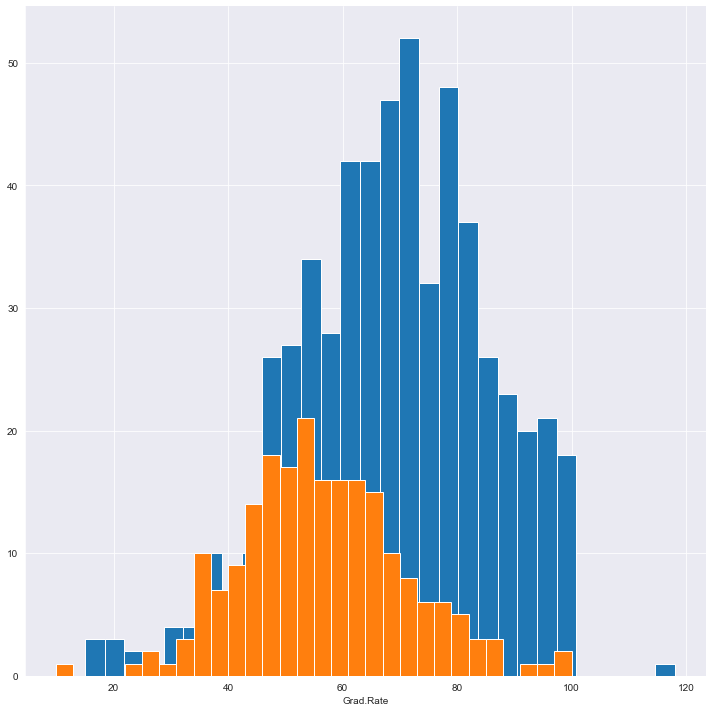

In [29]:
#Exercise- Plot a histogram of 'Grad.Rate' using FacetGrid

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue='Private',size=10)
g = g.map(plt.hist,'Grad.Rate',bins=30)

In [30]:
#As we can see from the histogram for Grad.Rate that some universities have Grad.Rate>100
#This is impossible. So we need to get rid of this unrealistic data

In [31]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [32]:
#As we can confirm from the table above, max graduation rate = 118% (impossible)
#So clear it out.

df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [33]:
df['Grad.Rate'].replace(118,np.nan,inplace=True)

In [35]:
avg_grad_rate = df['Grad.Rate'].mean()
df['Grad.Rate'].fillna(avg_grad_rate,inplace=True)

In [36]:
df.loc[95]

Unnamed: 0     Cazenovia College
Private                      Yes
Apps                        3847
Accept                      3433
Enroll                       527
Top10perc                      9
Top25perc                     35
F.Undergrad                 1010
P.Undergrad                   12
Outstate                    9384
Room.Board                  4840
Books                        600
Personal                     500
PhD                           22
Terminal                      47
S.F.Ratio                   14.3
perc.alumni                   20
Expend                      7697
Grad.Rate                65.3956
Name: 95, dtype: object

In [37]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60.0
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56.0
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54.0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59.0
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15.0


In [38]:
#We have cleaned our data.
#Let's set our index to Unnamed:0 and then proceed with ML

df.set_index('Unnamed: 0',inplace=True)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60.0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56.0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54.0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59.0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15.0


### Now that we've cleaned our data; let's proceed with Unsupervised MachineLearning using K-Means_Clustering.

In [50]:
#As we know, any model can only be trained over numeric data. So using LabelEncoder as-

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df = df.apply(lb.fit_transform)

In [52]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,352,337,356,22,40,460,275,169,98,23,232,46,42,120,12,219,39
Adelphi University,1,414,452,286,15,17,441,405,440,520,98,137,7,2,61,16,541,35
Adrian College,1,314,318,182,21,38,178,84,388,188,17,90,29,30,68,30,401,33
Agnes Scott College,1,57,61,42,58,77,31,57,466,442,23,48,68,61,20,37,713,38
Alaska Pacific University,1,8,6,3,15,32,3,358,175,251,105,137,52,36,58,2,560,1


In [53]:
#In this example, we have to cluster our data based on private type into 2 groups i.e. Private and Public

In [54]:
#For clustering (Unsupervised learning), we don't need our labels(Private in this case).
#So dropping them for our x. 
#Also, there is no need of declaring our y because it is unsupervised Machine Leaning and UNsupervised MachineLearning does
#not need 'y' i.e. label

x = df.drop('Private',axis=1)

In [55]:
x.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Abilene Christian University,352,337,356,22,40,460,275,169,98,23,232,46,42,120,12,219,39
Adelphi University,414,452,286,15,17,441,405,440,520,98,137,7,2,61,16,541,35


In [56]:
#Import KMeans library from sklearn.cluster

from sklearn.cluster import KMeans

In [57]:
#Create an object of KMeans.
#As we know, We need to pass the number of clusters we need to form. 
#It is an easy data example and we already know that we want to create 2 clusters(Public and Private Universities).

kmeans = KMeans(n_clusters=2,n_init=20,random_state=42)

In [58]:
#Next, train our model on our data(x)

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [59]:
#Now that we've trained our model, we can llok at predicted labels as-

kmeans.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [60]:
x['Actual Private'] = df['Private']
x['Predicted Private'] = kmeans.labels_

In [62]:
x

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Actual Private,Predicted Private
Unnamed: 0,,,,,,,,,,,,,,,,,,,
Abilene Christian University,352,337,356,22,40,460,275,169,98,23,232,46,42,120,12,219,39,1,1
Adelphi University,414,452,286,15,17,441,405,440,520,98,137,7,2,61,16,541,35,1,1
Adrian College,314,318,182,21,38,178,84,388,188,17,90,29,30,68,30,401,33,1,0
Agnes Scott College,57,61,42,58,77,31,57,466,442,23,48,68,61,20,37,713,38,1,0
Alaska Pacific University,8,6,3,15,32,3,358,175,251,105,137,52,36,58,2,560,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,416,392,298,3,14,478,490,127,212,35,92,36,24,147,14,22,19,0,1
Xavier University,388,432,348,23,35,456,392,402,394,65,98,49,39,72,31,444,63,1,1
Xavier University of Louisiana,404,451,348,33,49,451,130,136,271,70,35,43,39,83,20,360,28,1,1


In [63]:
#Let's have a look at the confusion matrix and classification report.

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix(df['Private'],kmeans.labels_)

array([[ 35, 177],
       [405, 160]], dtype=int64)

In [75]:
print(classification_report(x['Actual Private'],x['Predicted Private']))

              precision    recall  f1-score   support

           0       0.08      0.17      0.11       212
           1       0.47      0.28      0.35       565

    accuracy                           0.25       777
   macro avg       0.28      0.22      0.23       777
weighted avg       0.37      0.25      0.29       777

